## WGCNA: Infection and sex effects

In this first analysis, we are going to use the full dataset exported from `DESeq2` that contains the 77 non-outlier. Here we will investigate correlations between coexpression modules with infection status, sex, and contrasts between combinations of the two. 

Looking for modules of coexpressed transcripts in the variance stabilized transformed count data from `DESeq2` and relating them to trait data (i.e. infection status, range, etc.). Here are some good resources for learning more about how to apply WGCNA to our data set:

[WGCNA tutorials](https://horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/)

[Harvard WGCNA walkthrough](http://pklab.med.harvard.edu/scw2014/WGCNA.html)

Peter Langfelder blog posts: [categorical data](https://peterlangfelder.com/2018/11/25/working-with-categorical-variables/), [signed vs. unsigned](https://peterlangfelder.com/2018/11/25/signed-or-unsigned-which-network-type-is-preferable/), [signed vs. signed hybrid](https://peterlangfelder.com/2018/11/25/__trashed/)

[Matz lab code](https://github.com/sbarfield/tagSeq-commonGarden/blob/master/WGCNA_common_garden.r)

If you have already performed module construction (steps `adjacency()`, `TOMsimilarity()`, and `flashClust()`) and saved the output (`dissTOM` and `geneTree`), you can skip all steps through module construction and load in saved objects for downstream use.

Load in the package.

In [1]:
library(WGCNA)
options(stringsAsFactors = FALSE)
require(ggplot2)

Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor

Loading required package: ggplot2


## Infected vs. uninfected

At this stage, we'll just do bulk comparisons between parasitized and control, using the transformed counts that include the FP samples.

Read in the data. 

In [2]:
vsd <- read.table("../outputs/WGCNA_PvC.tsv", sep="\t")

Take a look.

In [3]:
head(vsd)
dim(vsd)

,AP_C_1,AP_C_2,AP_C_3,AP_C_4,AP_C_5,AP_P_1,AP_P_2,AP_P_3,AP_P_6,FP_C_10,...,NJ_P_7,SC_C_12,SC_C_14,SC_C_2,SC_C_6,SC_C_7,SC_C_9,SC_P_1,SC_P_2,SC_P_3
TRINITY_DN34991_c0_g1_i1,3.641429,5.133935,3.420182,4.259747,5.318919,5.088700,3.842374,4.006983,4.730440,2.896176,...,4.299920,3.328538,3.303639,2.328138,4.207435,3.622076,3.633048,3.515343,3.269081,4.137344
TRINITY_DN22619_c0_g1_i1,8.416757,8.786743,8.219426,8.618801,8.228496,8.415341,8.489646,7.932459,9.009789,7.982187,...,8.526789,8.767094,8.115655,7.776325,8.306834,7.920559,8.416652,8.908472,8.120426,8.554692
TRINITY_DN44279_c0_g1_i1,6.486347,6.302891,7.098636,6.961285,5.755006,7.168781,7.133692,8.978380,6.496501,7.077782,...,6.247454,4.745754,6.978128,4.805820,3.407069,5.488584,6.435398,3.393698,5.987111,6.240749
TRINITY_DN40042_c0_g1_i1,5.902975,5.469914,5.241330,5.222788,5.120424,5.264484,5.097314,5.852533,5.283792,5.936322,...,4.978439,5.087852,5.472861,5.717056,5.168087,5.327914,4.977120,5.525405,3.925800,5.072426
TRINITY_DN3373_c0_g1_i1,5.930380,4.479866,4.521061,5.387817,4.575910,6.082491,4.872463,4.529712,6.336153,5.078593,...,5.490823,5.087852,4.661060,4.588658,4.925092,4.167607,5.104495,5.349675,4.971831,4.798759
TRINITY_DN76095_c0_g1_i1,3.641429,3.609930,3.769737,3.810514,2.716473,4.151560,4.032165,4.909989,3.326816,3.938357,...,3.581053,3.704701,2.669897,3.894028,3.592528,3.622076,3.542507,3.729389,4.487233,3.871825


[1] 60488    77

Looks good. Now let's transpose it.

In [4]:
vsd <- t(vsd)
vsd[1:6,1:6]
dim(vsd)

,TRINITY_DN34991_c0_g1_i1,TRINITY_DN22619_c0_g1_i1,TRINITY_DN44279_c0_g1_i1,TRINITY_DN40042_c0_g1_i1,TRINITY_DN3373_c0_g1_i1,TRINITY_DN76095_c0_g1_i1
AP_C_1,3.641429,8.416757,6.486347,5.902975,5.930380,3.641429
AP_C_2,5.133935,8.786743,6.302891,5.469914,4.479866,3.609930
AP_C_3,3.420182,8.219426,7.098636,5.241330,4.521061,3.769737
AP_C_4,4.259747,8.618801,6.961285,5.222788,5.387817,3.810514
AP_C_5,5.318919,8.228496,5.755006,5.120424,4.575910,2.716473
AP_P_1,5.088700,8.415341,7.168781,5.264484,6.082491,4.151560


[1]    77 60488

Now we check to see if there are any genes or samples with too many missing values.

In [5]:
gsg = goodSamplesGenes(vsd, verbose = 3)
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

Good. Now we'll cluster the samples to identify outliers.

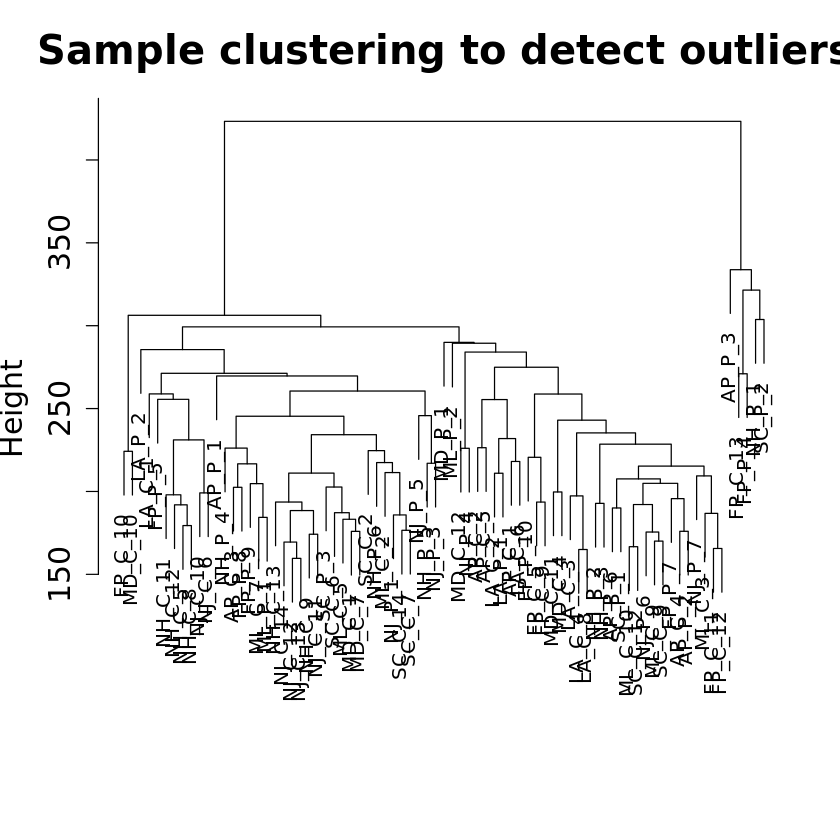

In [6]:
tree = hclust(dist(vsd), method = "average");
plot(tree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2)

Nothing looks too out of the ordinary to get chucked out. Note that this count data already excludes the outliers we removed in DESeq2 (MA control crabs and AP_C_6)

Now we're set up, let's start the actual calculations. First we'll enable multi-threading.

In [7]:
enableWGCNAThreads()

Allowing parallel execution with up to 35 working processes.


Then we'll start with actually performing these calculations. Note that these requires a lot of memory. Make sure to request enough memory when starting up your `srun` session

In [10]:
sft = pickSoftThreshold(vsd, verbose = 5, networkType="signed",  powerVector = c(seq(1, 10, by = 1), seq(12, 20, by = 2)))

pickSoftThreshold: will use block size 739.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 739 of 60488
   ..working on genes 740 through 1478 of 60488
   ..working on genes 1479 through 2217 of 60488
   ..working on genes 2218 through 2956 of 60488
   ..working on genes 2957 through 3695 of 60488
   ..working on genes 3696 through 4434 of 60488
   ..working on genes 4435 through 5173 of 60488
   ..working on genes 5174 through 5912 of 60488
   ..working on genes 5913 through 6651 of 60488
   ..working on genes 6652 through 7390 of 60488
   ..working on genes 7391 through 8129 of 60488
   ..working on genes 8130 through 8868 of 60488
   ..working on genes 8869 through 9607 of 60488
   ..working on genes 9608 through 10346 of 60488
   ..working on genes 10347 through 11085 of 60488
   ..working on genes 11086 through 11824 of 60488
   ..working on genes 11825 through 12563 of 60488
   ..working on genes 12564 through 13302 of 60488
   ..

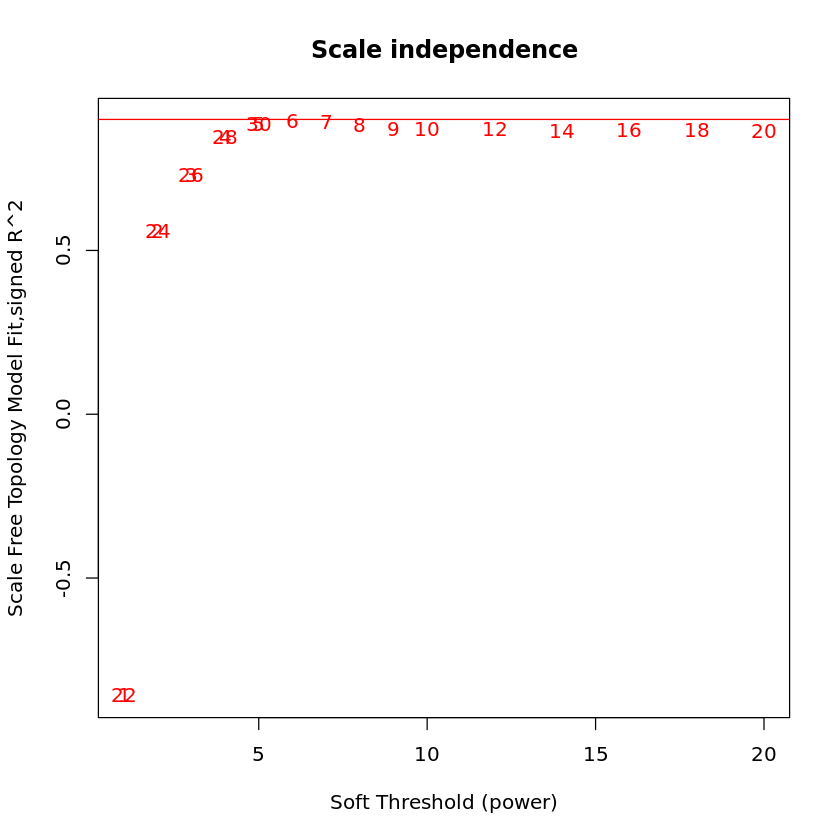

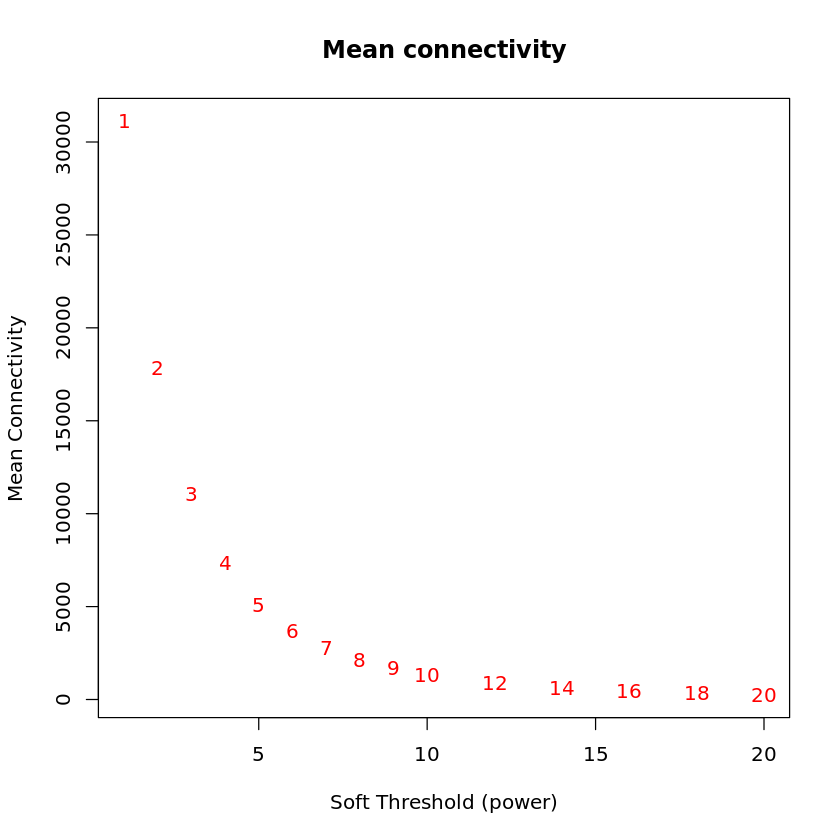

In [11]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
    xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
    main = paste("Scale independence"))
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
    labels=c(seq(1, 10, by = 1), seq(12, 30, by = 2)),col="red") #labels from power vector
abline(h=0.90,col="red")
plot(sft$fitIndices[,1], sft$fitIndices[,5],
    xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
    main = paste("Mean connectivity"))
    text(sft$fitIndices[,1], sft$fitIndices[,5], labels=c(seq(1, 10, by = 1), seq(12, 20, by = 2)), col="red")

We are going to pick a power of 6, as it is the first value to reach the plateau at ~0.9, as [recommended](https://horvath.genetics.ucla.edu/html/CoexpressionNetwork/Rpackages/WGCNA/Tutorials/FemaleLiver-02-networkConstr-auto.pdf). It's also the highest value overall, as the $r^{2}$ drops after a power of 6. 

Now we'll do the module construction. 

*SKIP THIS NEXT PART IF YOU HAVE ALREADY PERFORMED MODULE CONSTRUCTION. IT TAKES A LONG TIME. LOAD IN .RDATA BELOW*

In [ ]:
library(flashClust)
adjacency = adjacency(vsd, power = 6,type="signed")
TOM = TOMsimilarityFromExpr(vsd,networkType = "signed", TOMType = "signed", power = 6)
dissTOM = 1-TOM
geneTree = flashClust(as.dist(dissTOM),method="average")
save(dissTOM,geneTree,file="signedDissTOM_tree.RData")

In [12]:
load(file="signedDissTOM_tree.RData")

In [13]:
minModuleSize = 20;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
deepSplit = 4, pamRespectsDendro = FALSE,
minClusterSize = minModuleSize);
table(dynamicMods)
dynamicColors = labels2colors(dynamicMods)

 ..cutHeight not given, setting it to 0.973  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
    1     2     3     4     5     6     7     8     9    10    11    12    13 
35509 10236  8572  1317   656   521   482   437   391   389   330   244   223 
   14    15    16    17    18    19    20    21    22    23    24    25 
  180   180   175   128   112    81    64    61    60    58    46    36 

In [14]:
library(flashClust)
MEList = moduleEigengenes(vsd, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
METree = flashClust(as.dist(MEDiss), method = "average");

save(dynamicMods,dynamicColors,MEs,METree,geneTree,file="1stPassModules.RData")


Attaching package: ‘flashClust’

The following object is masked from ‘package:fastcluster’:

    hclust

The following object is masked from ‘package:stats’:

    hclust



In [15]:
load(file="1stPassModules.RData")

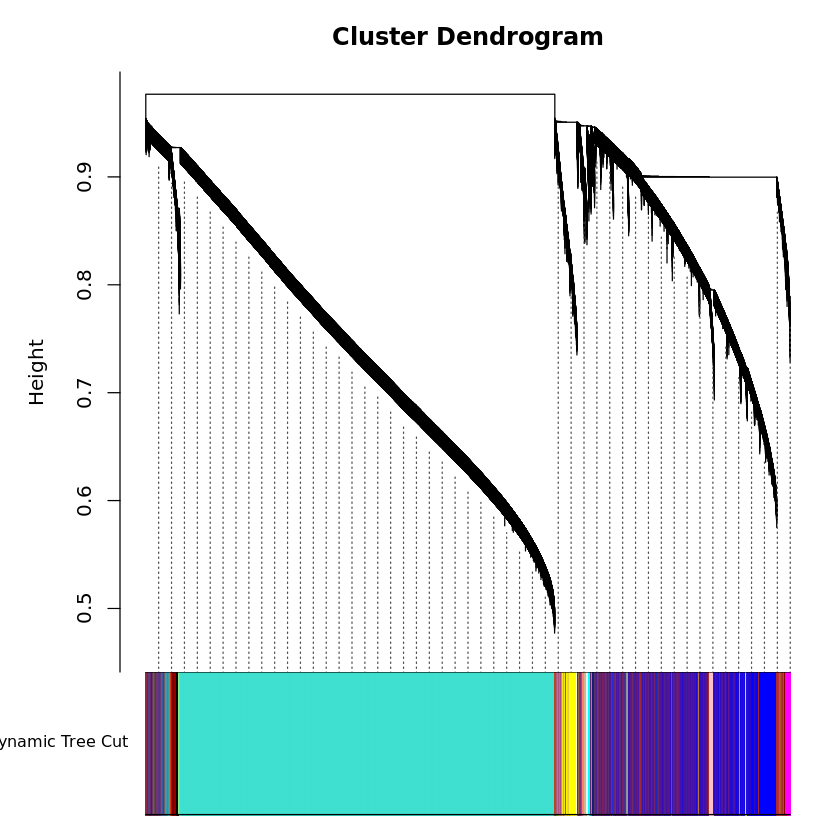

In [16]:
plotDendroAndColors(geneTree, dynamicColors,
c("Dynamic Tree Cut"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

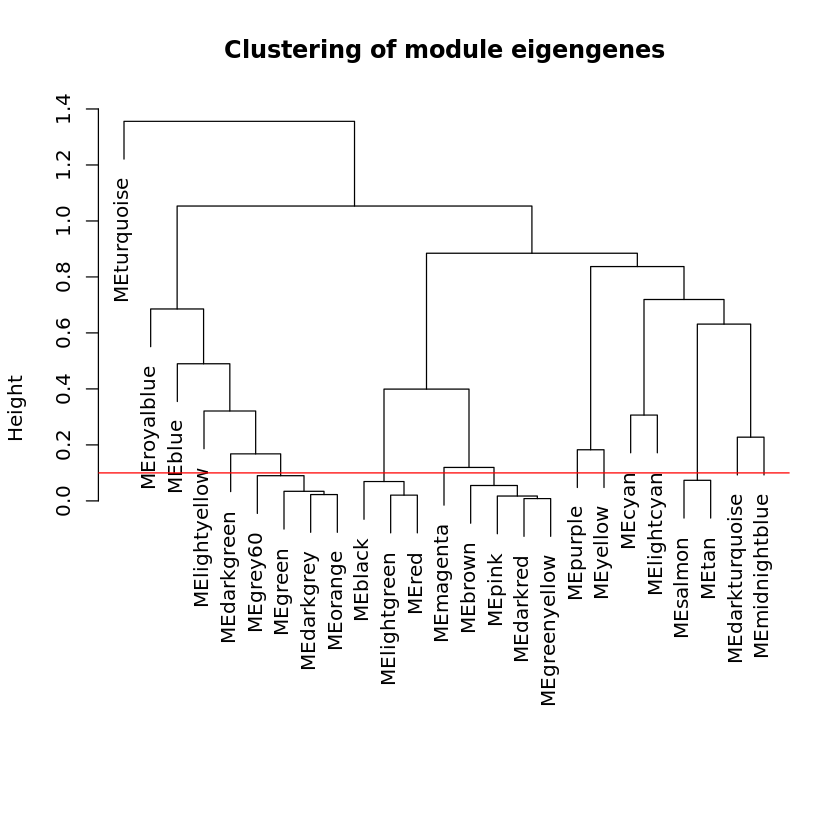

In [17]:
#sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes",
xlab = "", sub = "")
MEDissThres = 0.1
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [18]:
merge = mergeCloseModules(vsd, dynamicColors, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs

 mergeCloseModules: Merging modules whose distance is less than 0.1
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 25 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 16 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 16 module eigengenes in given set.


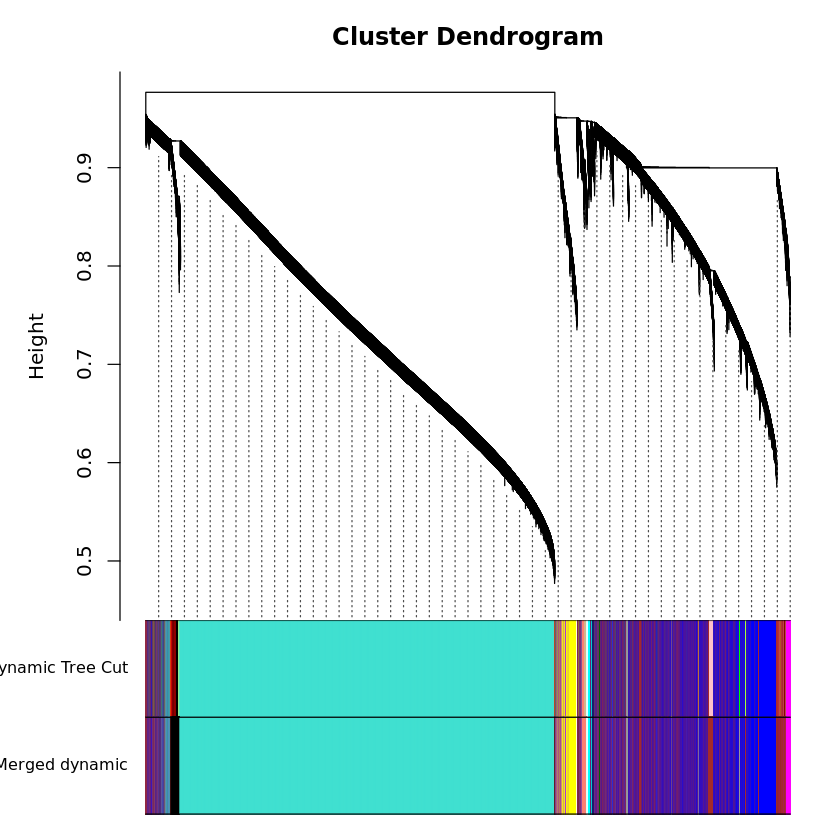

In [19]:
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
c("Dynamic Tree Cut", "Merged dynamic"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [20]:
moduleColors = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels = match(moduleColors, colorOrder)-1;
MEs = mergedMEs;


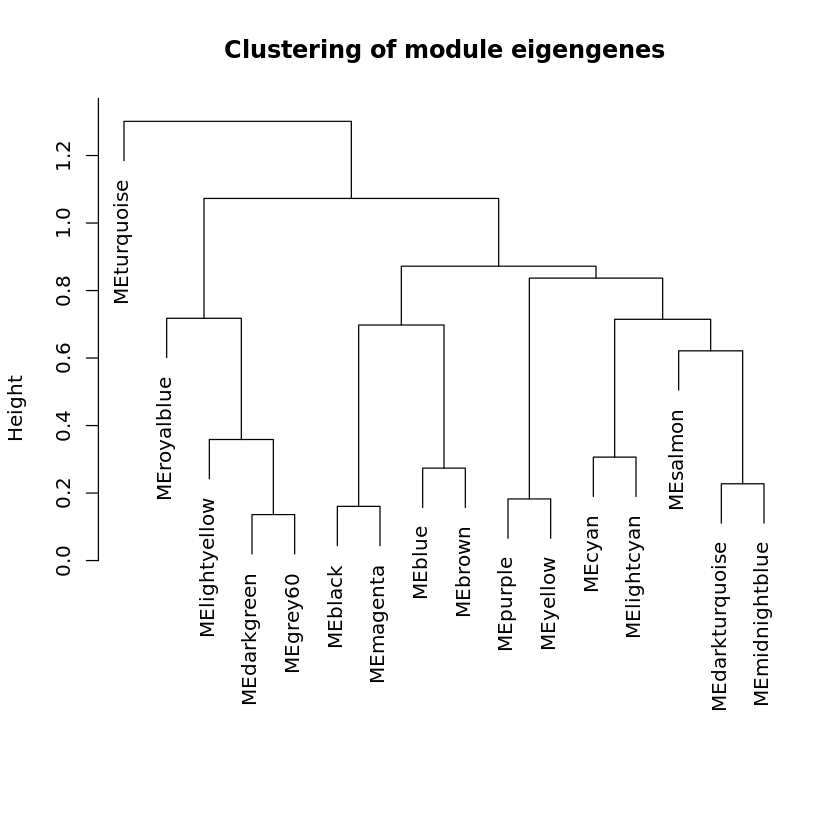

In [21]:
library(flashClust)
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = flashClust(as.dist(MEDiss), method = "average");
# Plot the result
plot(METree, main = "Clustering of module eigengenes",
xlab = "", sub = "")

In [22]:
table(moduleColors)

moduleColors
        black          blue         brown          cyan     darkgreen 
         1115         10236          9400           180            60 
darkturquoise        grey60     lightcyan   lightyellow       magenta 
           58           866           175            81           391 
 midnightblue        purple     royalblue        salmon     turquoise 
          180           389            64           467         35509 
       yellow 
         1317 

In [23]:
save(MEs, geneTree, moduleLabels, moduleColors, file = "networkdata_signed.RData")

## Trait data correlations

In [5]:
load(file = "networkdata_signed.RData")

Import the trait data.

In [6]:
coldata <- read.table("../metadata/DESeq2_coldata.txt", row.names=1, col.names=c("","site","condition","range","sex"), stringsAsFactors = FALSE)
coldata <- coldata[rownames(vsd),]
head(coldata)

,site,condition,range,sex
AP_C_1,AP,C,Native,F
AP_C_2,AP,C,Native,F
AP_C_3,AP,C,Native,M
AP_C_4,AP,C,Native,M
AP_C_5,AP,C,Native,M
AP_P_1,AP,P,Native,F


The data in this data.frame are all of class 'character' and represent categorical variables. WGCNA was originally constructed to look for correlations between expression modules and numeric trait data (i.e. levels of some disease biomarker, etc). Fortunately, the creators included functions to binarize combinations of categorical data so that we can compare among groups. We will use these to contrast among specific combinations of variables, in this example, sex and infection status. We'll subset the coldata to just include the condition and binarize it.

In [7]:
coldata <- coldata[,c(2,4)]
coldata$sex.condition <- paste(coldata$sex, coldata$condition)
head(coldata)

,condition,sex,sex.condition
AP_C_1,C,F,F C
AP_C_2,C,F,F C
AP_C_3,C,M,M C
AP_C_4,C,M,M C
AP_C_5,C,M,M C
AP_P_1,P,F,F P


In [8]:
coldata <- binarizeCategoricalColumns(coldata, 
      convertColumns = c("sex.condition"), 
      includePairwise = TRUE, includeLevelVsAll = FALSE)
coldata <- binarizeCategoricalColumns(coldata, 
      convertColumns = c("condition","sex"), 
      includePairwise = TRUE, includeLevelVsAll = FALSE)
head(coldata)

,condition.P.vs.C,sex.M.vs.F,sex.condition.F P.vs.F C,sex.condition.M C.vs.F C,sex.condition.M P.vs.F C,sex.condition.M C.vs.F P,sex.condition.M P.vs.F P,sex.condition.M P.vs.M C
AP_C_1,0,0,0,0,0,NA,NA,NA
AP_C_2,0,0,0,0,0,NA,NA,NA
AP_C_3,0,1,NA,1,NA,1,NA,0
AP_C_4,0,1,NA,1,NA,1,NA,0
AP_C_5,0,1,NA,1,NA,1,NA,0
AP_P_1,1,0,1,NA,NA,0,0,NA


In [9]:
# Define numbers of genes and samples
nGenes = ncol(vsd);
nSamples = nrow(vsd);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(vsd, moduleColors)$eigengenes
MEs = orderMEs(MEs0)
moduleTraitCor = cor(MEs, coldata, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

In [10]:
# correlations of genes with eigengenes
moduleGeneCor=cor(MEs,vsd)
moduleGenePvalue = corPvalueStudent(moduleGeneCor, nSamples);

moduleTraitCor = cor(MEs, coldata, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

png 
  2

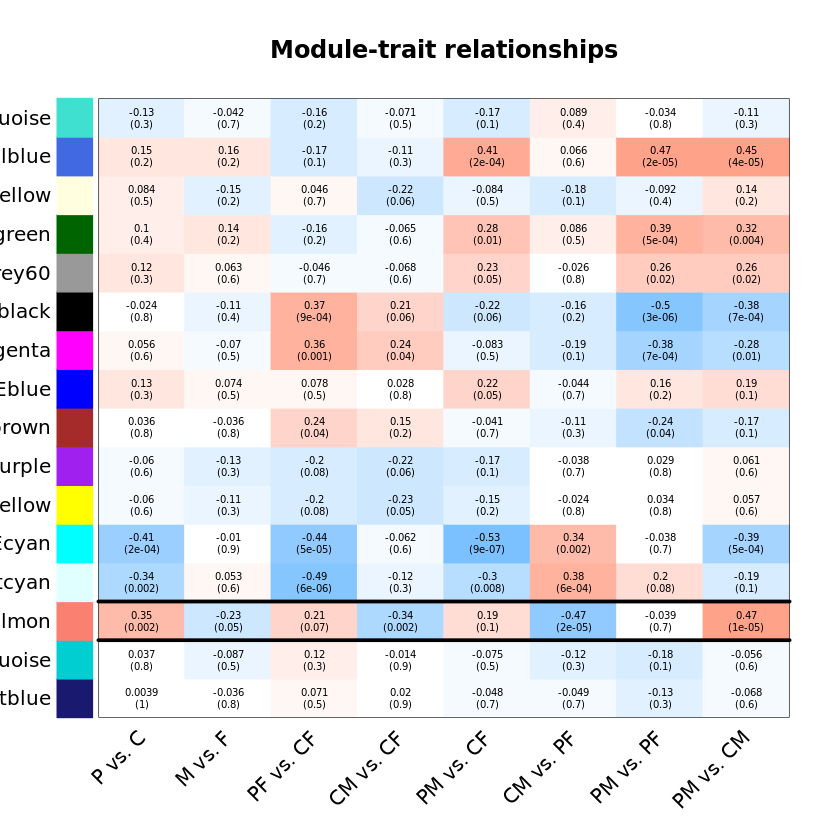

In [29]:
# Will display correlations and their p-values
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
# Display the correlation values within a heatmap plot
pdf(file="../vis/WGCNA_moduleCors_PvC.pdf", height=7, width=5)
par(mar = c(5, 9, 3, 3))
labeledHeatmap(Matrix = moduleTraitCor,
        xLabels = c("P vs. C","M vs. F","PF vs. CF", "CM vs. CF", "PM vs. CF", "CM vs. PF", "PM vs. PF","PM vs. CM"),
        #xLabels = colnames(coldata),
        yLabels = names(MEs),
        ySymbols = names(MEs),
        colorLabels = FALSE,
        plotLegend = FALSE,
        colors = blueWhiteRed(50),
        textMatrix = textMatrix,
        setStdMargins = FALSE,
        cex.text = 0.5,
        horizontalSeparator.y = c(13,14),
        horizontalSeparator.lwd = c(3,3),
        #showrRows = ,
        zlim = c(-1,1),
        main = paste("Module-trait relationships"))
dev.off()
labeledHeatmap(Matrix = moduleTraitCor,
        xLabels = c("P vs. C","M vs. F","PF vs. CF", "CM vs. CF", "PM vs. CF", "CM vs. PF", "PM vs. PF","PM vs. CM"),
        #xLabels = colnames(coldata),
        yLabels = names(MEs),
        ySymbols = names(MEs),
        colorLabels = FALSE,
        plotLegend = FALSE,
        colors = blueWhiteRed(50),
        textMatrix = textMatrix,
        setStdMargins = FALSE,
        cex.text = 0.5,
        horizontalSeparator.y = c(13,14),
        horizontalSeparator.lwd = c(3,3),
        #showrRows = ,
        zlim = c(-1,1),
        main = paste("Module-trait relationships"))

MEsalmon shows extreme overexpression in parasitized males compared to uninfected males. It also shows underexpression in control males compared to control females. Notably, not different between infected males and infected females or infected males and control females.

Make scatterplots of the gene significance vs. module membership (kME) for each module against infection status. 

In [37]:
# scatterplots of gene significance (correlation-based) vs kME

whichTrait="condition.P.vs.C"
selTrait = as.data.frame(coldata[,whichTrait]);
names(selTrait) = whichTrait
# names (colors) of the modules
modNames = substring(names(MEs), 3)
geneModuleMembership = as.data.frame(signedKME(vsd, MEs));
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples));
names(geneModuleMembership) = paste("MM", modNames, sep="");
names(MMPvalue) = paste("p.MM", modNames, sep="");
geneTraitSignificance = as.data.frame(cor(vsd, selTrait, use = "p"));
GSPvalue = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples));
names(geneTraitSignificance) = paste("GS.", names(selTrait), sep="");
names(GSPvalue) = paste("p.GS.", names(selTrait), sep="");
png(filename="../vis/WGCNA_gene_significance_PvC.png", pointsize=40, height=3000, width=1500)
par(mfrow=c(6,3))
counter=0
for(module in modNames[1:length(modNames)]){
column = match(module, modNames);
moduleGenes = moduleColors==module;
#trr="heat resistance"
verboseScatterplot(abs(geneModuleMembership[moduleGenes, column]),
abs(geneTraitSignificance[moduleGenes, 1]),
xlab = paste(module,"module membership"),
ylab = paste("GS for", whichTrait),
col = module,mgp=c(2.3,1,0),
cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.8)
}
dev.off()

png 
  2

View the saved image. Hard to display here.

Now we'll make graphs of the module expression value of each sample for the three modules associated with infection. We'll read in coldata again because we overwrote it earlier when binarizing.

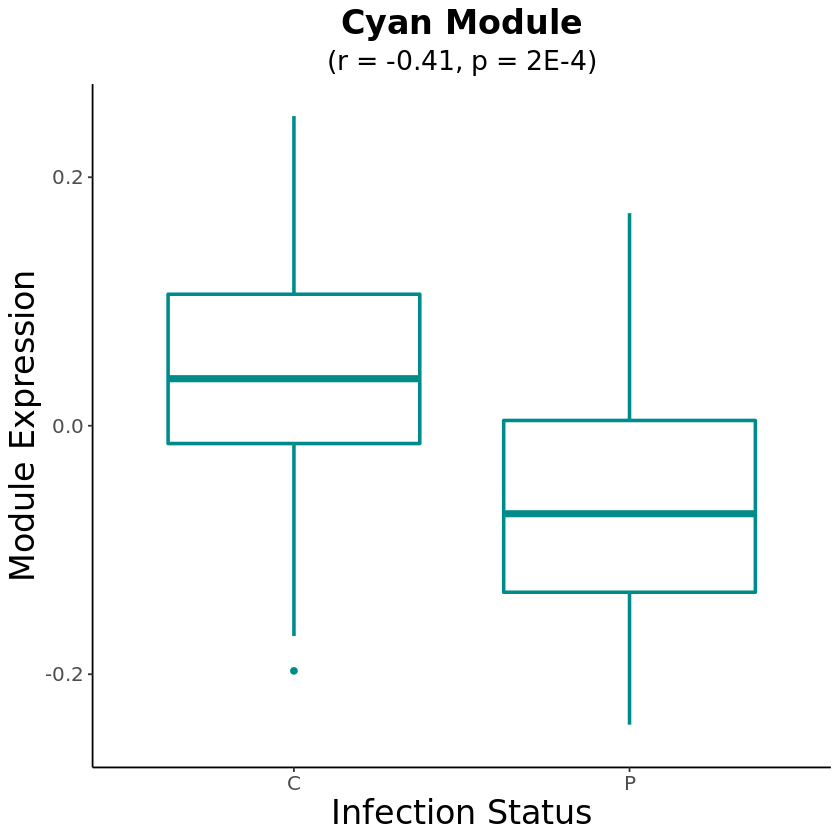

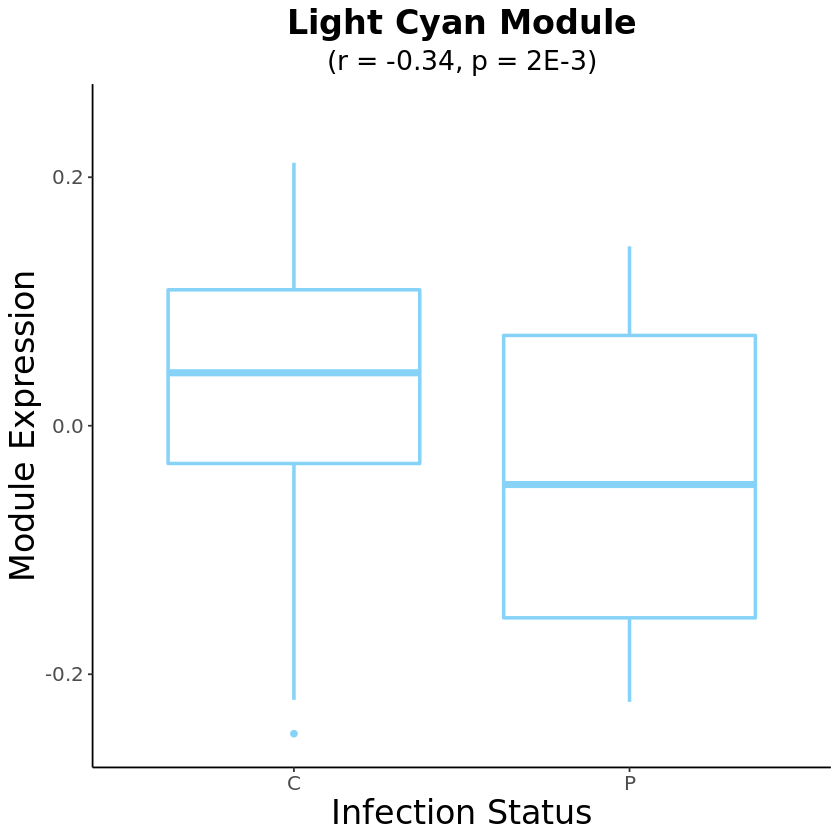

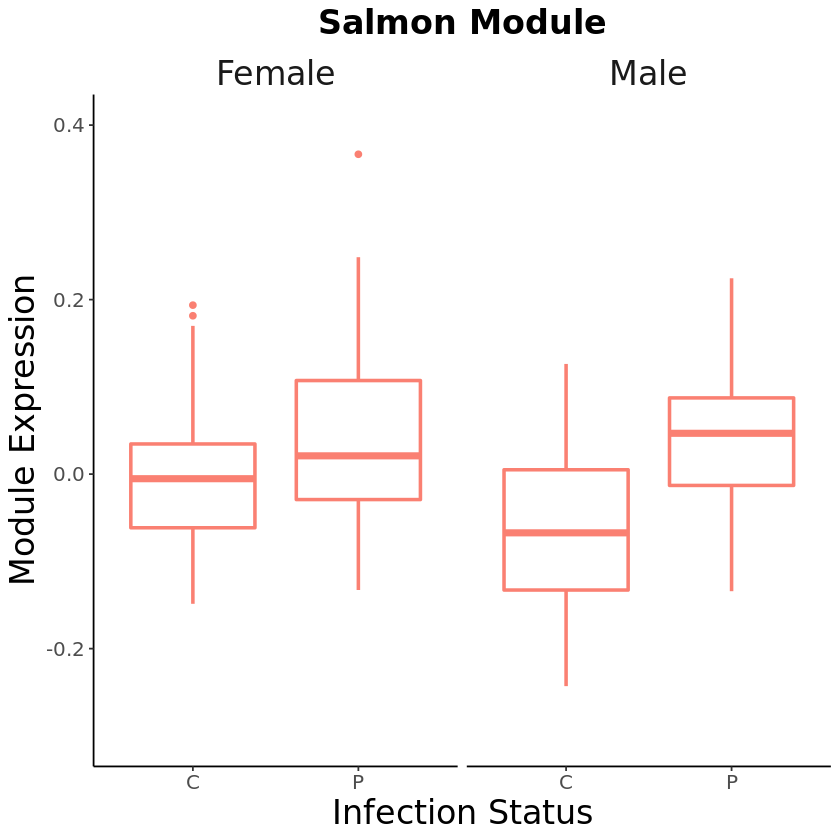

In [15]:
coldata <- read.table("../metadata/DESeq2_coldata.txt", row.names=1, col.names=c("","site","condition","range","sex"), stringsAsFactors = FALSE)
coldata <- coldata[rownames(vsd),]
cyan <- data.frame(expr=MEs$MEcyan, sex=coldata$sex, condition=coldata$condition, row.names = rownames(coldata))
ggplot(cyan, aes(x=condition, y=expr)) +
    theme_classic() +
    geom_boxplot(lwd = 1, color="#008B8B") +
    #geom_jitter(col="#008B8B", width=0.25, size = 3) +
    labs(y="Module Expression", x="Infection Status", title="Cyan Module", subtitle = "(r = -0.41, p = 2E-4)") +
    scale_y_continuous(breaks=c(-0.2,0,0.2),limits=c(-0.25,0.25)) +
    theme(axis.text=element_text(size=12), 
          axis.title=element_text(size=20),
          strip.text.x = element_text(size = 20),
          panel.grid = element_blank(),
          plot.title = element_text(size=20, hjust = 0.5, face="bold"),
          plot.subtitle = element_text(size=16, hjust=0.5, face="plain"))
ggsave("../vis/cyan_boxplot.pdf", width = 5, height = 5)
lightcyan <- data.frame(expr=MEs$MElightcyan, sex=coldata$sex, condition=coldata$condition, row.names = rownames(coldata))
ggplot(lightcyan, aes(x=condition, y=expr)) +
    theme_classic() +
    geom_boxplot(lwd = 1, color="#87D3F8") +
    #geom_jitter(col="#87D3F8", width=0.25, size = 3) +
    labs(y="Module Expression", x="Infection Status", title="Light Cyan Module", subtitle = "(r = -0.34, p = 2E-3)") +
    scale_y_continuous(breaks=c(-0.2,0,0.2),limits=c(-0.25,0.25)) +
    theme(axis.text=element_text(size=12), 
          axis.title=element_text(size=20),
          strip.text.x = element_text(size = 20),
          panel.grid = element_blank(),
          plot.title = element_text(size=20, hjust = 0.5, face="bold"),
          plot.subtitle = element_text(size=16, hjust=0.5, face="plain"))
ggsave("../vis/lightcyan_boxplot.pdf", width = 5, height = 5)
salmon <- data.frame(expr=MEs$MEsalmon, sex=coldata$sex, condition=coldata$condition, row.names = rownames(coldata))
sex.labs <- c("Female", "Male")
names(sex.labs) <- c("F", "M")
ggplot(salmon, aes(x=condition, y=expr)) +
    theme_classic() +
    facet_grid(.~sex, labeller = as_labeller(sex.labs)) +
    geom_boxplot(lwd = 1, color="salmon") +
    #geom_jitter(col="salmon", width=0.25, size = 3) +
    labs(y="Module Expression", x="Infection Status", title="Salmon Module") +
    ylim(c(-0.3,0.4)) +
    theme(axis.text=element_text(size=12), 
          axis.title=element_text(size=20),
          strip.text.x = element_text(size = 20),
          panel.grid = element_blank(),
          plot.title = element_text(size=20, hjust = 0.5, face="bold"),
          strip.background = element_blank())
ggsave("../vis/salmon_boxplot.pdf", width = 5, height = 5)

## Export data for `GO_MWU`

Now we are going to extract transcript kME information for modules of interest for use in `GO_MWU`. This first bit of code creates a dataframe with all of the transcripts with their assigned module and kME value.

In [18]:
allkME <- as.data.frame(signedKME(vsd, MEs))
results <- data.frame(transcript = colnames(vsd), module = paste("kME",moduleColors, sep=""))
results <- cbind(results, allkME)

results$kME <-
  results[cbind(
    seq_len(nrow(results)),
    match(results$module, colnames(results))
  )]

results$kME <- as.numeric(results$kME)

results <- data.frame(transcript=results$transcript, module=results$module, kME=results$kME)
head(results)
dim(results)

transcript,module,kME
TRINITY_DN34991_c0_g1_i1,kMEturquoise,0.2802668
TRINITY_DN22619_c0_g1_i1,kMEturquoise,0.3950443
TRINITY_DN44279_c0_g1_i1,kMEblue,0.3175225
TRINITY_DN40042_c0_g1_i1,kMEturquoise,0.2913650
TRINITY_DN3373_c0_g1_i1,kMEturquoise,0.1744527
TRINITY_DN76095_c0_g1_i1,kMEblue,0.7283965


[1] 60488     3

The code below loops through a list of modules of interest, changes the kMEs for all transcripts not belonging to that module to 0 using the data.frame above, removes the module column, and saves to file. This is the format required for analyzing `WGCNA` modules in `GO_MWU` using it's [two-layered strategy](https://github.com/z0on/GO_MWU#analyzing-wgcna-modules).

In [55]:
#can change the object being iterated over to just the ones you want, colnames(allkME) retrieves all

path_to_main_dir <- "/vortexfs1/scratch/ztobias/RhithroLoxo_DE/"

module_select <- colnames(allkME) #or specify list c("kMEgreenyellow","kMEturquoise",...) 

for (i in module_select){
    export <- results[,c(1,3)]
    not_in <- results[results$module!=i,1]
    export[export[,1] %in% not_in,2] <- 0
    write.csv(export, file = paste(path_to_main_dir,"outputs/GO_MWU_WGCNA_",i,".csv",sep=""), quote = FALSE, row.names = FALSE)
}


## Explore annotations for transcripts in select modules

Read in annotations

In [19]:
annot <- read.table("../EnTAP/entap_outfiles/similarity_search/DIAMOND/overall_results/best_hits_lvl0.tsv", sep="\t", fill=TRUE, header=TRUE, quote="", stringsAsFactors = FALSE)
decapod_annot <- annot#[grepl("decapoda",annot[,15]),] #uncomment this if you want only decapod hits

Select module of interest and find matching annotations

In [23]:
sortkME <- results[order(-results[,3]),] #sort by kME
sortkME <- sortkME[sortkME[,2]=="kMEcyan",] #select module
module_annot <- decapod_annot[decapod_annot[,1]%in%sortkME[,1],c(1,3,11,12,13,14)] #select relevant columns
module_annot <- module_annot[order(match(module_annot[,1],sortkME[,1])),] #order by kME

Check out top kME genes (regardless of annot)

In [24]:
sortkME

,transcript,module,kME
13735,TRINITY_DN2709_c0_g1_i2,kMEcyan,0.9377451
6086,TRINITY_DN10466_c0_g1_i1,kMEcyan,0.9375860
41617,TRINITY_DN12527_c0_g1_i1,kMEcyan,0.9328927
36328,TRINITY_DN275_c0_g1_i1,kMEcyan,0.9281410
16245,TRINITY_DN17225_c0_g1_i1,kMEcyan,0.9275403
51008,TRINITY_DN93978_c0_g1_i1,kMEcyan,0.9264599
7021,TRINITY_DN82248_c0_g1_i1,kMEcyan,0.9219676
10517,TRINITY_DN10236_c0_g1_i2,kMEcyan,0.9177936
41715,TRINITY_DN5361_c0_g1_i1,kMEcyan,0.9173176
30397,TRINITY_DN8634_c3_g1_i1,kMEcyan,0.9112804


Check out the top annotated

In [25]:
module_annot

,Query.Sequence,Percent.Identical,E.Value,Coverage,Description,Species
18106,TRINITY_DN17225_c0_g1_i1,40.1,5.1e-71,56.9,ROT80027.1 hypothetical protein C7M84_001252 [Penaeus vannamei],penaeus vannamei
13161,TRINITY_DN93978_c0_g1_i1,35.5,5.6e-49,56.2,MPC14079.1 V-type proton ATPase proteolipid subunit [Portunus trituberculatus],portunus trituberculatus
14615,TRINITY_DN5361_c0_g1_i1,76.8,1.6e-179,64.9,tr|A0A0N7ZCH4|A0A0N7ZCH4_9EUCA Fibrinogen C-terminal domain-containing protein OS=Scylla olivacea OX=85551 PE=4 SV=1,scylla olivacea
11499,TRINITY_DN24498_c0_g1_i1,61.4,7.3e-152,80.8,XP_027233397.1 arylsulfatase B-like [Penaeus vannamei],penaeus vannamei
3213,TRINITY_DN12972_c0_g1_i3,60.6,0.0e+00,71.4,XP_027219198.1 uncharacterized protein LOC113811614 [Penaeus vannamei],penaeus vannamei
6718,TRINITY_DN13962_c0_g1_i1,75.0,2.0e-198,83.2,tr|A0A0P4VX27|A0A0P4VX27_9EUCA Fibrinogen C-terminal domain-containing protein OS=Scylla olivacea OX=85551 PE=4 SV=1,scylla olivacea
170,TRINITY_DN149370_c0_g1_i1,41.7,1.5e-12,60.0,"XP_028153917.1 alpha-1,6-mannosyl-glycoprotein 2-beta-N-acetylglucosaminyltransferase-like [Diabrotica virgifera virgifera]",diabrotica virgifera virgifera
8261,TRINITY_DN9001_c0_g1_i1,89.0,0.0e+00,76.2,tr|A0A0P4W2M2|A0A0P4W2M2_9EUCA Uncharacterized protein OS=Scylla olivacea OX=85551 PE=4 SV=1,scylla olivacea
21627,TRINITY_DN144175_c0_g1_i1,61.4,1.2e-53,52.2,tr|A0A0P4WFP0|A0A0P4WFP0_9EUCA Uncharacterized protein OS=Scylla olivacea OX=85551 PE=4 SV=1,scylla olivacea
6455,TRINITY_DN13992_c0_g1_i1,69.8,1.5e-90,73.4,tr|A0A0P4WCJ3|A0A0P4WCJ3_9EUCA SCP domain-containing protein OS=Scylla olivacea OX=85551 PE=3 SV=1,scylla olivacea


Clear environment for easy loading next time.

In [ ]:
#rm(list = ls())

Print session info and save to file.

In [ ]:
sessionInfo()
writeLines(capture.output(sessionInfo()), "../envs/WGCNA_sessionInfo.txt")